In [ ]:
# Postdam PM2.5 Linear Regression Forcasting 

* With Ridge And Lasso Regression Models
* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [2]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [3]:
# import src
import model_base as mb
import supervised as sv

# Linear Regression

## Data Exploration

* Load Data


In [4]:
df = mb.get_cleaned_df()
mb.set_start_index(df, 'Start_Timestamp')
df.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


# Linear Regression 


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. When applied to time series data, linear regression can help analyze and forecast trends over time.

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[10.65613175  9.00218368  8.49414407 ...  9.74688202 10.15845453
 10.05854868]
MAE: 2.2927
MSE: 12.6822
RMSE: 3.5612
MAPE: 0.3426
MASE: 2.2119725489718607
MAE: 2.3551
MSE: 10.8163
RMSE: 3.2888
MAPE: 0.3231
MASE: 2.1803572595098597


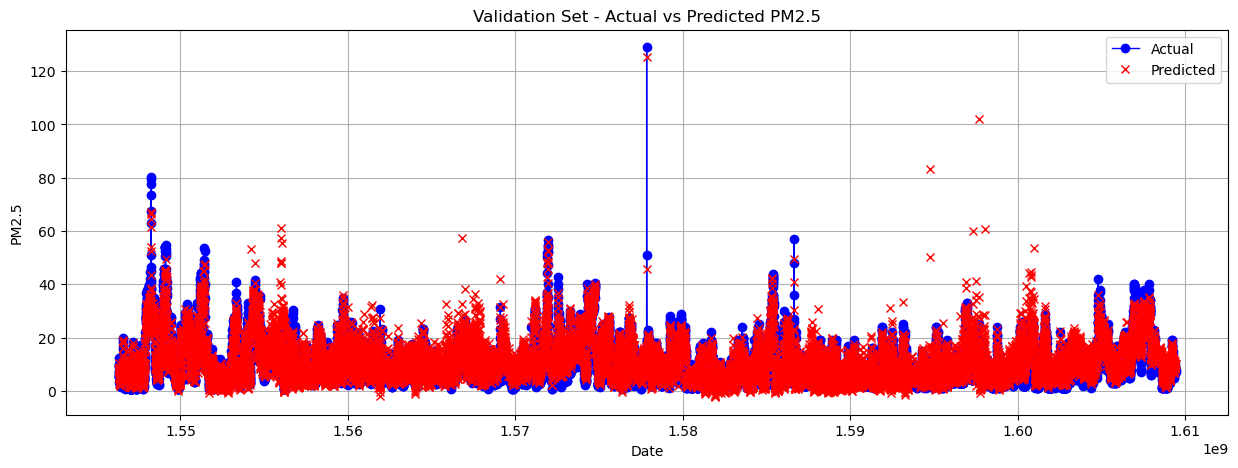

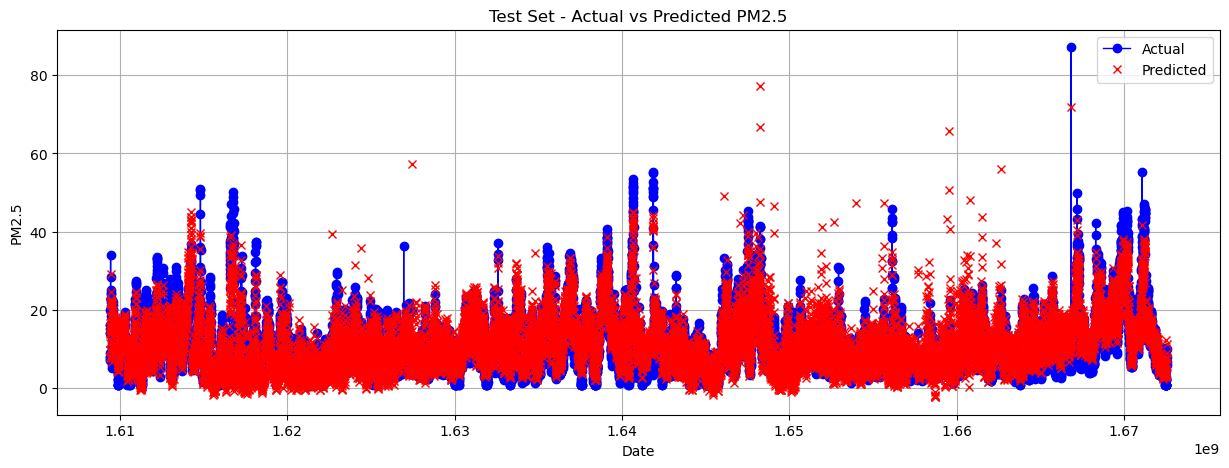

In [5]:
sv.train_and_evolve(df)

# HyperPramater Tuning

Linear Regression typically has fewer hyperparameters than other models like neural networks or ensemble models. However, there are still some aspects of the model that you can adjust. For instance, you can apply regularization, which can be considered a form of hyperparameter tuning. The most common types of regularized linear regression are Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization).

## Ridge Regression (L2)
Ridge regression, also known as Tikhonov regularization, is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. In multicollinear data, least-squares estimates are unbiased, but their variances are large, so they may be far from the true value. Ridge regression adds a degree of bias to the regression estimates, which often results in a decrease in the standard errors.

* RandomizedSearchCV is a useful alternative to GridSearchCV when the parameter space is large. It samples a fixed number of parameter combinations from the specified distributions, which can be much more efficient, especially when some hyperparameters do not influence the performance of the model significantly.


### Model Creation

In [6]:
# sv.ringe_train_and_evolve(df)

## Lasso Regression (L1)

Lasso regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This is particularly useful when you have a large number of predictors because it automatically performs variable selection.

The key difference between ridge regression and lasso regression lies in the penalty term added to the cost function. While ridge regression adds a squared magnitude of the coefficient as a penalty term to the cost function, lasso regression adds the absolute value of the magnitude of the coefficient as the penalty term.

The advantages of lasso regression include:

* It can produce simpler and more interpretable models due to feature selection.
* It is less prone to overfitting as it penalizes the absolute size of the coefficients.
* It can handle complex scenarios with many variables or features in the dataset.

However, lasso regression can also have disadvantages, such as biasing estimates towards zero and sometimes underperforming when all variables are included in the true model. It can also struggle with grouped variables, where it tends to select only one variable from a group and ignore the others.

### Model Creation


Training set size: 52588
Validation set size: 17529
Test set size: 17531
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[10.65599758  9.00211301  8.49409294 ...  9.74702971 10.15863865
 10.05872634]
MAE: 2.2927
MSE: 12.6822
RMSE: 3.5612
MAPE: 0.3426
MASE: 2.2120069075939575
MAE: 2.3551
MSE: 10.8164
RMSE: 3.2888
MAPE: 0.3231
MASE: 2.1803811390807795


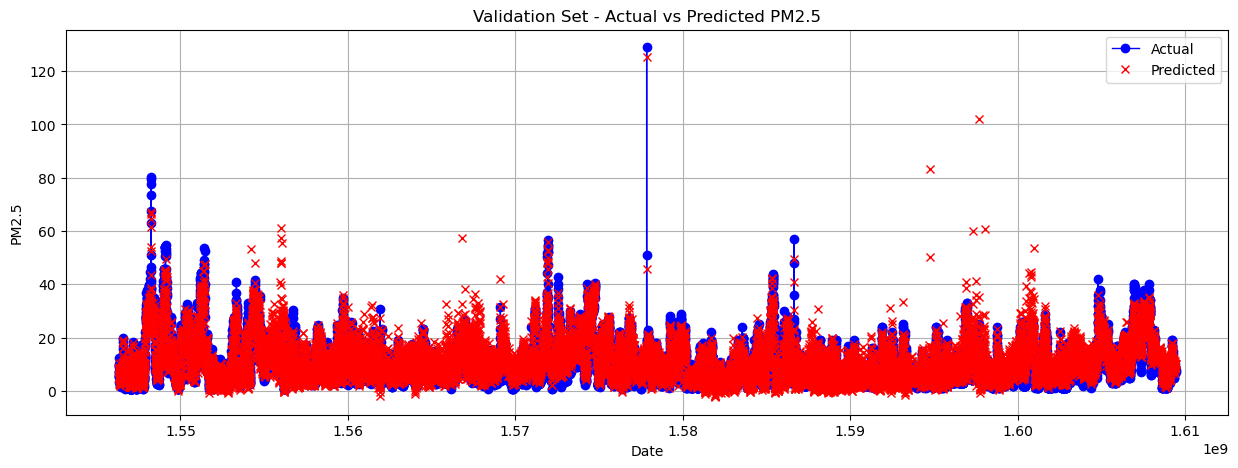

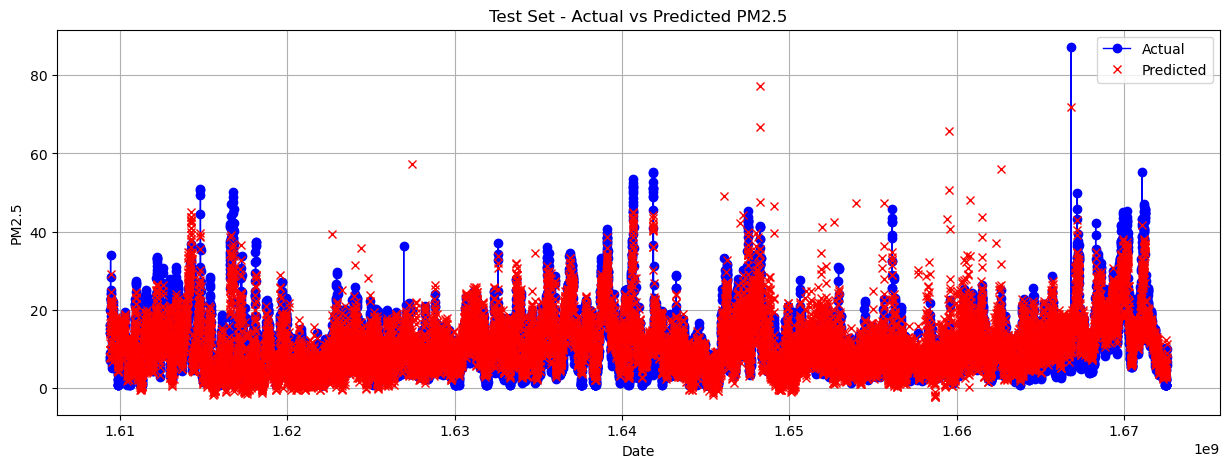

In [7]:
# Define the model
sv.lasso_train_and_evolve(df)

# Support Vector Regression (SVR) Forcasting  

Support Vector Regression (SVR) is an application of the Support Vector Machine (SVM) algorithm for regression problems. SVM is a supervised learning algorithm commonly used for classification tasks, but it can also be adapted for regression, resulting in the SVR model. SVR attempts to find the best fit line (in a higher-dimensional space) that has the maximum number of points within a certain threshold distance from the line. The main idea is to minimize error, individualizing the hyperplane that maximizes the margin.

In SVR:

* The goal is to find a function that has at most an epsilon deviation from the actually obtained targets y for all the training data, and at the same time is as flat as possible.
* SVR uses the same principles as SVM for classification, with only a few minor differences. First, because output is a real number it becomes very hard to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM.

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[10.54854758  8.55384922  7.92957547 ...  7.2472026   6.79267016
  7.00955838]
MAE: 1.7515
MSE: 9.3971
RMSE: 3.0655
MAPE: 0.2388
MASE: 1.6898705057800105
MAE: 1.7924
MSE: 7.7107
RMSE: 2.7768
MAPE: 0.2307
MASE: 1.659473951752249


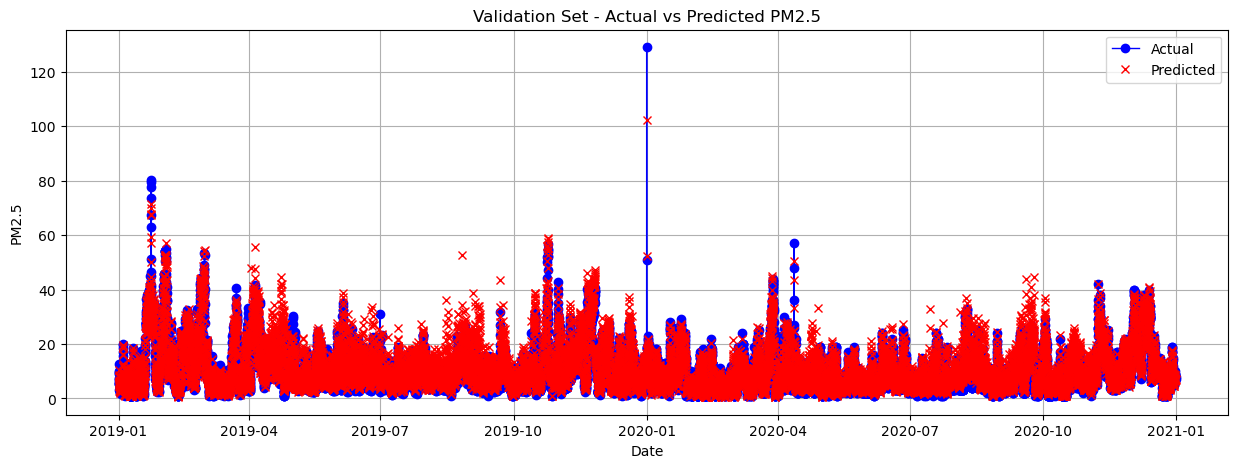

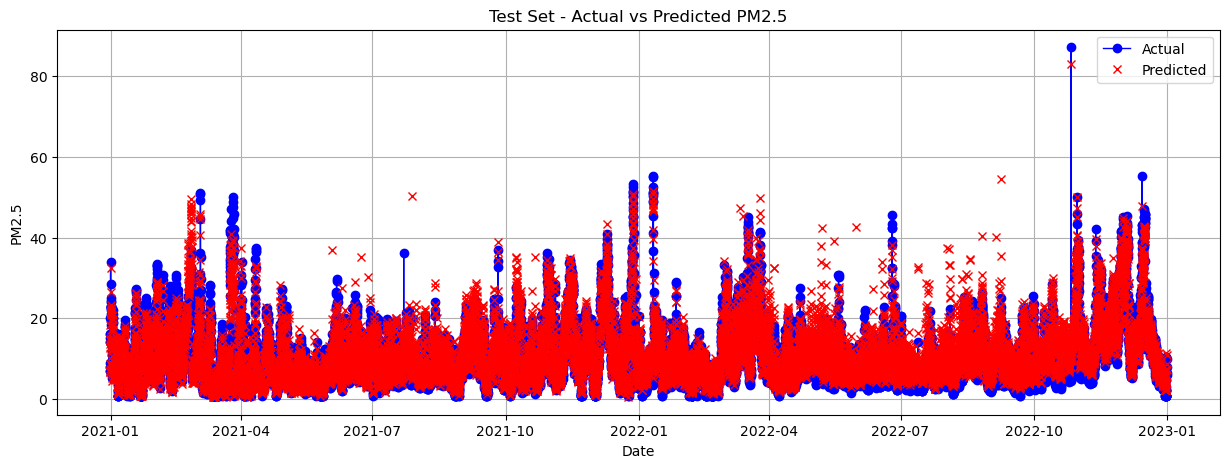

In [8]:
df= mb.get_cleaned_datetime_df()
mb.set_start_date_time_index(df)

sv.svr_train_and_evolve(df)

In [ ]:
# HyperPramater Tuning

best_svr_estimater_model = sv.tune_and_evaluate_svr(df)

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-29 23:29:07
Fitted 2023-11-29 23:29:07
Fitting 5 folds for each of 10 candidates, totalling 50 fits
